#### Here we try out an alternative [API](https://disease.sh/docs/#/COVID-19%3AWorldometers) to get data in JSON format with realible data but we will proceed using Bigquery google open data for the analysis

In [46]:
import requests

def get_covid_data():
    """
    Retrieves COVID-19 data from an API and prints the response.

    Returns:
    None
    """
    url = "https://disease.sh/v3/covid-19/all?yesterday=10"
    headers = {
        'accept': "application/json",
    }
    response = requests.request("GET", url, headers=headers)
    print(response.text)
    print(response)
    print(response.status_code)

get_covid_data()


{"updated":1712975237656,"cases":704753890,"todayCases":0,"deaths":7010681,"todayDeaths":0,"recovered":675619811,"todayRecovered":790,"active":22123398,"critical":34794,"casesPerOneMillion":90413,"deathsPerOneMillion":899.4,"tests":7026505313,"testsPerOneMillion":884400.59,"population":7944935131,"oneCasePerPeople":0,"oneDeathPerPeople":0,"oneTestPerPeople":0,"activePerOneMillion":2784.59,"recoveredPerOneMillion":85037.8,"criticalPerOneMillion":4.38,"affectedCountries":231}
<Response [200]>
200


In [45]:
import json
data = json.loads(response.text)
print(type(data))
print(data)

<class 'dict'>
{'updated': 1712974637711, 'cases': 704753890, 'todayCases': 0, 'deaths': 7010681, 'todayDeaths': 0, 'recovered': 675619811, 'todayRecovered': 790, 'active': 22123398, 'critical': 34794, 'casesPerOneMillion': 90413, 'deathsPerOneMillion': 899.4, 'tests': 7026505313, 'testsPerOneMillion': 884400.59, 'population': 7944935131, 'oneCasePerPeople': 0, 'oneDeathPerPeople': 0, 'oneTestPerPeople': 0, 'activePerOneMillion': 2784.59, 'recoveredPerOneMillion': 85037.8, 'criticalPerOneMillion': 4.38, 'affectedCountries': 231}


## Now first we do is importing libraries and config the credentials

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery


In [3]:
import os
project_id = os.environ.get("GOOGLE_CLOUD_PROJECT")
api_json = os.environ.get("GOOGLE_APPLICATION_CREDENTIALS")


In [4]:
client = bigquery.Client(project_id)

## We get the data set

In [5]:
# Construct a reference to the "covid19_open_data" dataset
dataset_ref = client.dataset("covid19_open_data", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [6]:
# List all the tables in the "covid19_open_data" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:  
    print(table.table_id)

compatibility_view
covid19_open_data


In [7]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("covid19_open_data")

# API request - fetch the table
table = client.get_table(table_ref)

## Get the schema to watch the data columns available in the database

In [8]:
#print information on all the columns in the "full" table
table.schema

[SchemaField('location_key', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('date', 'DATE', 'NULLABLE', None, None, (), None),
 SchemaField('place_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('wikidata_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('datacommons_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('country_code', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('country_name', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('iso_3166_1_alpha_2', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('iso_3166_1_alpha_3', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('aggregation_level', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('new_confirmed', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('new_deceased', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('cumulative_confirmed', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('cumulat

In [9]:
#print information of the first five rows
client.list_rows(table, max_results=5).to_dataframe()

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,location_geometry
0,AR,2020-02-28,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
1,AR,2020-04-04,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
2,AR,2022-04-18,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
3,AR,2021-03-03,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
4,AR,2021-12-13,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)


### We pick the elements of the not nulls columns of the data we want to get.
#### The logic of the cell is to execute a BigQuery SQL query to retrieve COVID-19 data for the United States of America from the covid19_open_data dataset. The query filters the data for non-null values and orders it by date in descending order. The query is then executed using the client.query() method, and the results are stored in a pandas DataFrame named results. The DataFrame is then printed.

In [10]:

query = """
SELECT *
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE country_name = 'United States of America'
    AND NOT EXISTS (
        SELECT 1
        FROM UNNEST([CAST(date AS STRING), CAST(country_name AS STRING), CAST(cumulative_vaccine_doses_administered AS STRING),CAST(population AS STRING) , CAST(cumulative_deceased AS STRING), CAST(cumulative_deceased AS STRING), CAST(new_confirmed AS STRING), CAST(population_density AS STRING)]) AS value
        WHERE value IS NULL
    )
ORDER BY date DESC
LIMIT 1000;
"""
dry_run_config = bigquery.QueryJobConfig(dry_run=True)
dry_run_query_job = client.query(query, job_config=dry_run_config)
print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))
query_job = client.query(query)
results = query_job.to_dataframe()



This query will process 12576008229 bytes.


### The next cells are the ploting of the data relevant from Covid19 in the US and further analysis.

#### The three firsts plots we get its the cumulative deceased over time, the cumulative vaccine doses administered and the new deceased over time. Just taking a glance we can observe that the peak of the timeline it's aproximately at january of 2022, in this period we can aprecciate the slop at this time incraeses, meaning it grew faster at that point, we can also note that the cumulative vaccination also grew faster after that point as a response.

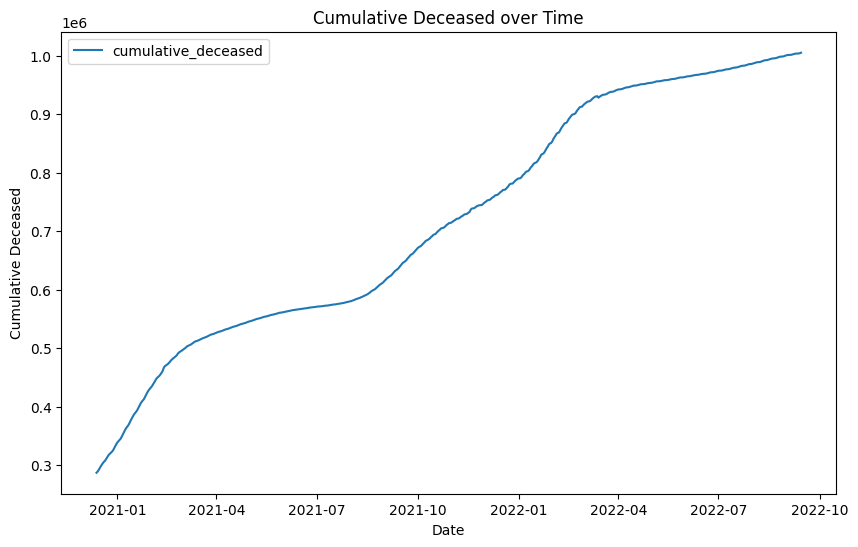

In [13]:

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
results.plot(x='date', y='cumulative_deceased', ax=ax, title='Cumulative Deceased over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Deceased')
plt.title('Cumulative Deceased over Time')
plt.show()


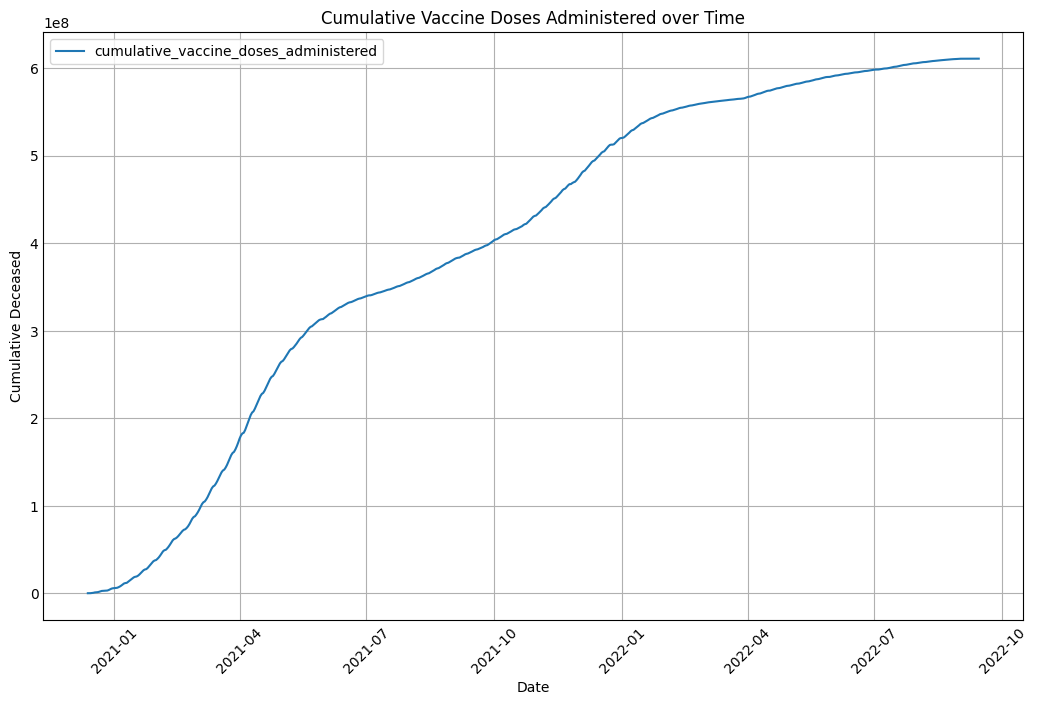

In [24]:

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
results.plot(x='date', y='cumulative vaccine doses administered', ax=ax, title='Cumulative Vaccine Doses Administered over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Deceased')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.show()


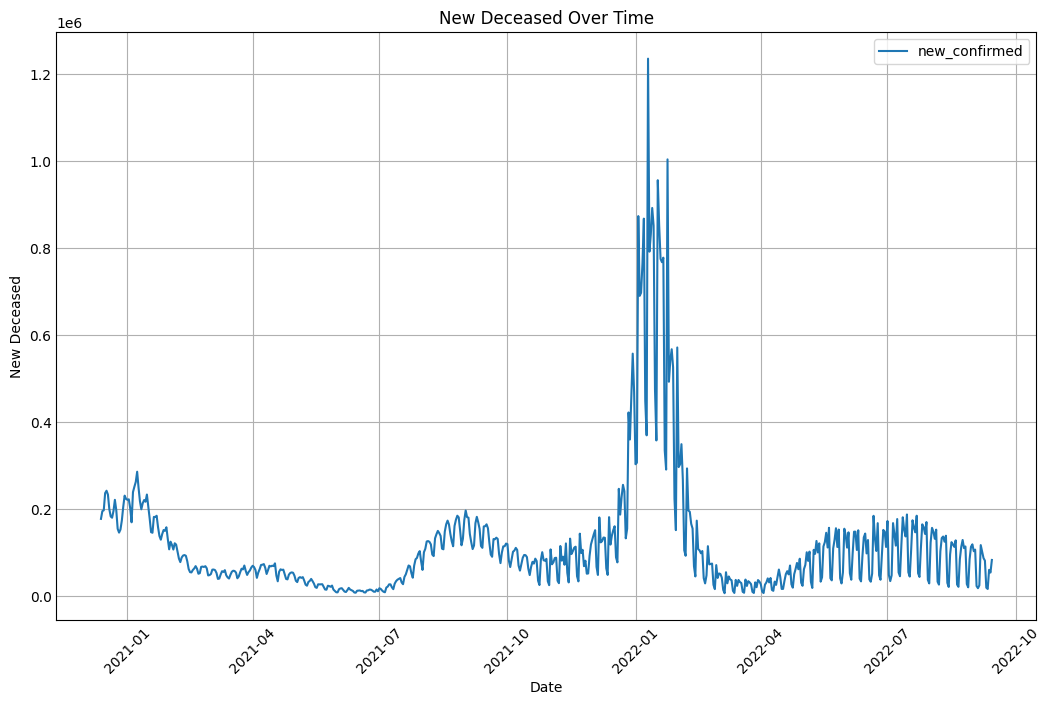

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
results.plot(x='date', y='new_confirmed', ax=ax, title='New Deceased Over Time')
plt.xlabel('Date')
plt.ylabel('New Deceased')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees

plt.show()

#### Then we have the new infected percentage and its relation to the infected population percentage, in the peak of the new deceased there were aproximately a 35% percent of the total population of the state infected, this was a huge medical concern and justifies the amounts of deceases at that time.
#### The second plot relate the percentage of population infected and we can see that in the peak point of deceased and vaccination plans its also the peak of infected, that backup the affirmations earlier.

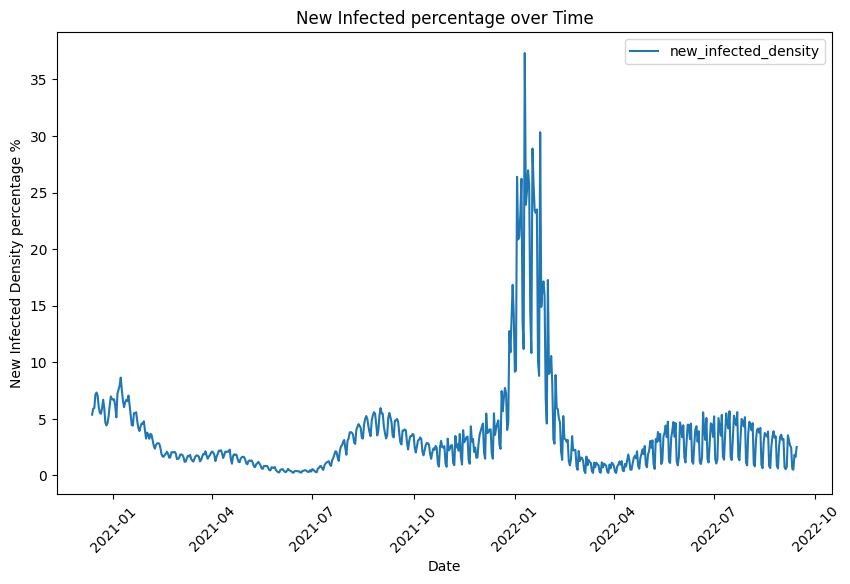

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
results['new_infected_density'] = results['new_confirmed'] * 100 / results['population'] * 100

# Plot the data
results.plot(x='date', y='new_infected_density', ax=ax, title='New Infected percentage over Time')
plt.xlabel('Date')
plt.ylabel('New Infected Density percentage %')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.show()

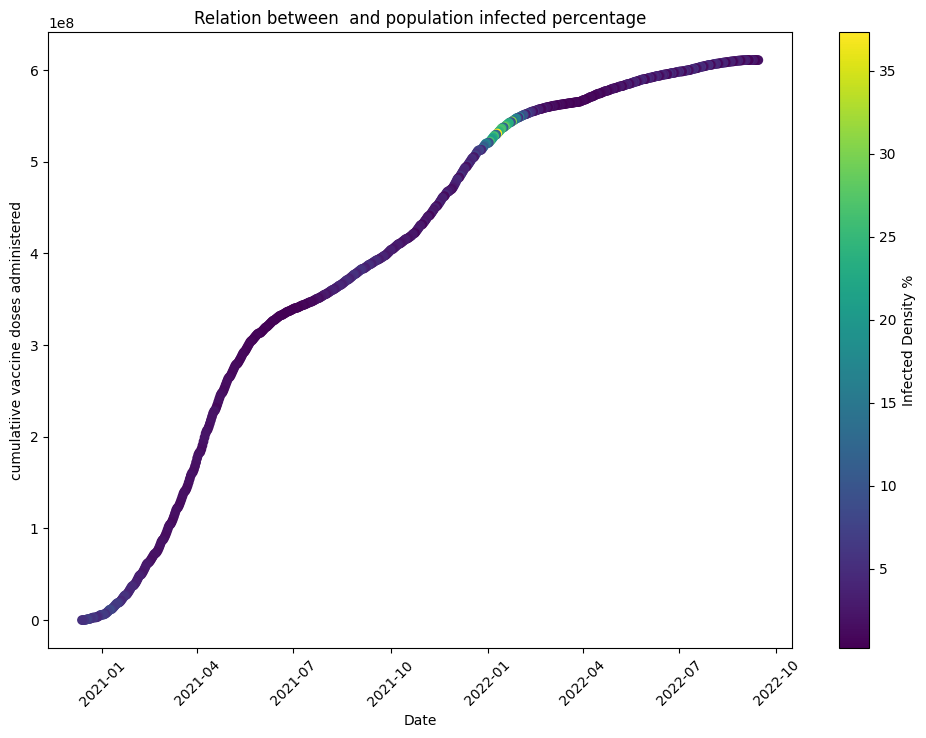

In [32]:
# Crear el scatter plot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figsize as per your requirement
scatter = plt.scatter(results['date'], results['cumulative_vaccine_doses_administered'], c=results['new_infected_density'], cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('Date')
plt.ylabel('cumulatiive vaccine doses administered')
plt.title('Relation between  and population infected percentage')

# Agregar color a los puntos según la cantidad de personas infectadas
plt.colorbar(scatter, label='Infected Density %')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
# Mostrar el plot
plt.show()
